## The Diabetes Dataset

In this exercise we will be working with the [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

The dataset consists of 8 medical predictor variables and one target variable, which were gathered in order to predict diabetes outcome in a female population of the native American Pima-tribe (USA). The dataset was part of a kaggle competition.

The data is stored in a CSV-file. We use the pandas package to load the data. An introduction in to pandas can be found [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html).


In [1]:
# for data analysis and manipulation
import pandas as pd

# for manipulation of graph and figures
from matplotlib import pyplot as plt

# access to square root function from mathematical library
from math import sqrt

#import assertion from numpy
from numpy.testing import assert_almost_equal

In [2]:
# this loads the data into a pandas DataFrame, './diabetes.csv' specifies the directory for the datafile
df = pd.read_csv('./diabetes.csv')

In [3]:
# this command shows the first rows of the table
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# in a jupyter-notebook, you can display the documentation for any function/method/object by propending a question mark:
?plt.scatter

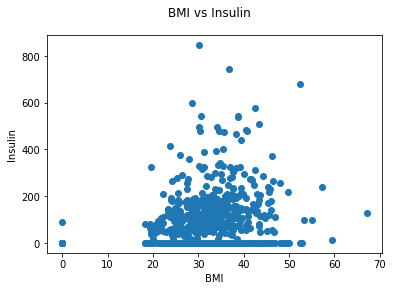

In [5]:
# let's explore the dataset a little bit
# for this exercise we are interested in the relationship between insulin and BMI.
# For this we can produce a scatter-plot of BMI vs Insulin.
# Try to explore other variables as well, using the plt.scatter function

plt.scatter(df.BMI, df.Insulin)
plt.xlabel('BMI')
plt.ylabel('Insulin')
plt.suptitle('BMI vs Insulin')
plt.show()

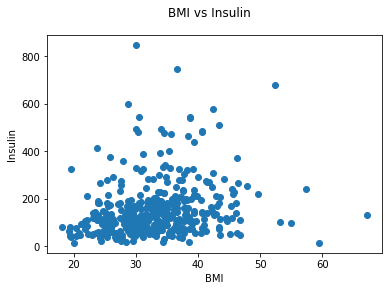

In [6]:
# In the plot above, we can see that there are many datapoints which do not have a measurement for Insulin (Insulin == 0).
# We decide that we want to exclude these values. 

# There are also missing values for BMI (BMI == 0), which we exclude as well.

df = df[df.Insulin>0]
df = df[df.BMI>0]
plt.scatter(df.BMI, df.Insulin)
plt.xlabel('BMI')
plt.ylabel('Insulin')
plt.suptitle('BMI vs Insulin')
plt.show()

# Step 1: Implementation using lists
**Task 1.1:** Write functions to caluclate the mean and variance. Call those functions to calculate the mean and variance for BMI and Insulin.

$$Mean, \mu = \frac{\sum x_i}{n} $$

$$Variance, \sigma ^{2} = \frac{\sum (x - \mu)^{2}}{n}$$

In [7]:
# Calculate the mean value of a python list of numbers
# def is used to define our own functions

def mean(values):
    return sum(values)/len(values)

# Calculate the variance of a list of numbers
def variance(values):
    values_mean = mean(values)
    return sum([(x - values_mean)**2 for x in values]) / len(values)

In [8]:
# we store our variables in lists
x = list(df.BMI)
y = list(df.Insulin)

In [9]:
# calculate mean and variance

mean_x, mean_y = mean(x),mean(y)
var_x, var_y = variance(x),variance(y)

print(f"x stats: mean={mean_x:.3f} variance={var_x:.3f}")
print(f"y stats: mean={mean_y:.3f} variance={var_y:.3f}")

assert_almost_equal(mean_x, 33.073, 3, "mean_X is incorrect")
assert_almost_equal(var_x, 49.210, 3, "var_x is incorrect")

assert_almost_equal(mean_y, 155.718, 3, "mean_X is incorrect")
assert_almost_equal(var_y, 14096.406, 3, "var_x is incorrect")
print("Good work!")


x stats: mean=33.073 variance=49.210
y stats: mean=155.718 variance=14096.406
Good work!


**Expected output**:  
x stats: mean = 33.073 variance = 49.210  
y stats: mean = 155.718 variance = 14096.406

Now we want to investigate if the BMI and Insulin are somehow associated. We do this by calculating the covariance:

The covariance is a measure of association between x and y. It is positive if y increases with increasing x, negative if y decreases as x increases, and zero if there is no linear tendency for y to change with x. If x and y are independent, then σ(x,y) = 0, 

$$Cov (x,y) = \frac{\sum(x_{i}-\bar{x})(y_{i}-\bar{y})}{n} $$

**Question 1.1:** Are two variables x, y always independent, if their covariance is 0? Write your answer in the field below by double-clicking.

No. 

For example, the covariance of $x$ and $sin(x)$ is 0, given $$x\in\R $$
and $$0 \leq x \leq 2\pi$$


In [10]:
# Calculate covariance between x and y
def covariance(x, y):
    covar = 0.0
    mean_x = mean(x)
    mean_y = mean(y)
    for i,j in zip(x,y):
        covar += (i-mean_x) * (j-mean_y)
    return covar / float(len(x))

covar = covariance(x, y)
print('Covariance: %.3f' % (covar))
assert_almost_equal(covar,189.938, 3, "Covariance does not match!")
print("Good job!")


Covariance: 189.938
Good job!


**Expected output**:  
Covariance: 189.938

In [11]:
import numpy as np

test = np.arange(0,np.pi,0.0001)
test_sine = np.sin(test)
test_cov = covariance(test,test_sine)
print('Covariance between x and sin(x): %.6f' % (test_cov))
assert_almost_equal(test_cov,0, 3, "Covariance does not match!")

Covariance between x and sin(x): 0.000029


Now we want to find coefficients for a line, that predicts our observations best.  

To find the 'best fit' of coefficients for this predictor, we calculate the least-squares linear regression. The least-squares solution yields the values of $a$ and $b$ that minimize the mean squared residual. The formula is the following:

$$a = \bar y − b * \bar x $$

$$b = Cov(x, y) / Var(x)$$

Thus, the least-squares estimators for the intercept and slope of a linear regression are simple functions of the observed means, variances, and covariances.   
 
**Task 1.2:** Write a function that calculates the model parameters. Call this function to calculate the coefficients $a$ and $b$ for our linear model to predict the Insulin-level from a BMI observation.

In [12]:
# Calculate coefficients a and b
def coefficients(x, y):
    mean_x = mean(x)
    mean_y = mean(y)
    b = covariance(x,y) / variance(x)
    a = mean_y - b * mean_x 
    return a,b

a, b = coefficients(x,y)
print('Coefficients: a=%.3f, b=%.3f' % (a, b))
assert_almost_equal(a, 28.067, 3, "coefficient a was not correct")
assert_almost_equal(b, 3.860, 3, "coefficient b was not correct")
print("good job")

Coefficients: a=28.067, b=3.860
good job


**Expected output:**  
Coefficients: a=28.067, b=3.860

Now that we predicited the coefficients for our 'best fit' linear regression model, we need to test it by predicting Insulin-levels from observing BMIs. In other words, if we have a measurement of the BMI, how well can we predict the Insulin level with our model?

To do this, we take our linear regression function, insert our estimated coefficients, and calculate y for each observation x. 

$$\hat y = a + b * x$$


**Task 1.3:** Write a function that predicts y from x. Call this function with x and y.


In [13]:
# Make predictions
def simple_linear_regression(x, y):
    a, b = coefficients(x, y)
    return [a+b*i for i in x]

predictions = simple_linear_regression(x,y)

To evaluate our predictions, we look at the difference between the Insulin level, that our model predicts and the true Insulin level and calculate the root mean squared error (rmse).

$$ RMSE = \sqrt{\frac{\sum (\hat{y_{i}}-y_{i})^2}{n}} $$

**Task 1.4:** Write a function that calculates the root mean squared  error, between the true and predicted value. 

In [14]:
 
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    assert len(actual) == len(predicted), "Actual and prediction must be the same length!"
    sum_error = sum([(p-a)**2 for p,a in zip(predicted,actual)])
    mean_error = sum_error / len(actual)
    return sqrt(mean_error)


# Evaluate regression algorithm on training dataset
def evaluate_algorithm(x, y, algorithm):
    predicted = simple_linear_regression(x,y)
    rmse = rmse_metric(y,predicted)
    return rmse

rmse = evaluate_algorithm(x, y, simple_linear_regression)
print('RMSE: %.3f' % (rmse))
assert_almost_equal(rmse, 115.600, 3, "RMSE does not match!")

RMSE: 115.600


**Expected output: **   
RMSE: 115.600

Let's plot our results with the pyplot package from matplotlib:  

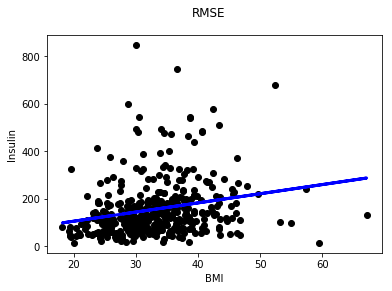

In [15]:
plt.scatter(x, y, color='black')
plt.xlabel('BMI')
plt.ylabel('Insulin')
plt.suptitle('RMSE')
plt.plot(x, predictions, color='blue', linewidth=3)


# Discussion:  
1) What can you say about the association between BMI and Insulin?  
2) Is BMI a good predictor for Insulin?  
3) What would be your next steps to improve the prediction for Insulin?  

**Task 1.5:** Write your answers in the cell below

In [16]:
covariance(x,y)/(sqrt(var_x)*sqrt(var_y))


0.22805015741657114

In [17]:
def sum_squared_totals(y):
    mean_y=mean(y)
    return sum([(i-mean_y)**2 for i in y])

def sum_squared_error(x,y,algorithm):
    mean_y=mean(y)
    predicted = simple_linear_regression(x,y)
    return sum([(p-mean_y)**2 for p in predicted])

def r2(x,y,algorithm):
    return sum_squared_error(x,y,algorithm)/sum_squared_totals(y)

r2(x,y,simple_linear_regression)

0.05200687429772286

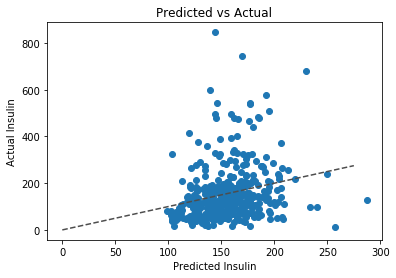

In [36]:
plt.scatter(predictions, y)
plt.title("Predicted vs Actual")
plt.xlabel("Predicted Insulin")
plt.ylabel("Actual Insulin")
plt.plot((0,275), (0,275), ls="--", c=".3")
plt.show()

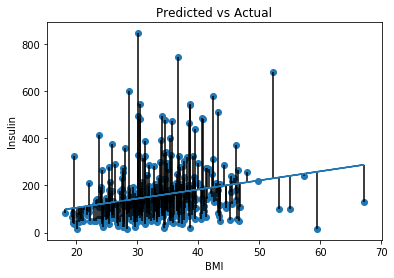

In [19]:
#Residuals Plot
x = list(df.BMI)
y = list(df.Insulin)
predictions = simple_linear_regression(x, y)

fig, ax = plt.subplots()
ax.plot(x,predictions)
ax.scatter(x, y)
ax.vlines(x,y,predictions)

ax.set_title("Residuals")
ax.set_ylabel("Insulin")
ax.set_xlabel("BMI")

plt.show()

1. 
We can calculate the correlation coeffient using the following formula:

````python
covariance(x,y)/(sqrt(var_x)*sqrt(var_y))
````
The result shows, that the correlation between bmi and insulin is `0.22` and well below `0.8`.
This leads to the conclusion that they are not associated.
2. Therefore BMI is a bad indicator or predictor for Insulin.
3. Go back to the original dataset and try other features or combinations of them. We could also try to find a non-linear relationship between BMI and Insulin.



# Step 2: Implementation using numpy

Working with lists required us to write a lot of code. Python can save you from all this work, if you are familiar with the numpy package.
If you are not familiar with numpy yet. We recommend to browse through the documentation page at https://www.numpy.org and also work through the provided tutorial there.  

In [20]:
# First we need to import the numpy package
import numpy as np

# The 'as np' notion is optional, but it is helpful because we can use the np abbreviation 
# when we call functions from the numpy module. 

**Task 2.1:**  
1) Define x and y. This time, we do not have to convert them into lists. They can keep it as arrays.  
2) Calculate the mean and variance for x and y, using numpy functions. 

In [21]:
# calculate mean and variance usind pandas directly
mean_x = df.BMI.mean()
mean_y = df.Insulin.mean()

#pandas uses empirical variance (`ddof=0`) by default. 
#Set degrees of freedom to 0 to trigger statisticians. ;)
var_x = df.BMI.var(ddof=0)

var_y = df.Insulin.var(ddof=0)

print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

assert_almost_equal(mean_x, 33.073, 3, "mean_X is incorrect")
assert_almost_equal(var_x, 49.210, 3, "var_x is incorrect")

assert_almost_equal(mean_y, 155.718, 3, "mean_X is incorrect")
assert_almost_equal(var_y, 14096.406, 3, "var_x is incorrect")
print("correct")

x stats: mean=33.073 variance=49.210
y stats: mean=155.718 variance=14096.406
correct


In [22]:
# calculate mean and variance usind numpy
x = np.array(df.BMI)
y = np.array(df.Insulin)

mean_x = np.mean(x)
mean_y = np.mean(y)

var_x = np.var(df.BMI)

var_y = np.var(df.Insulin)

print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

assert_almost_equal(mean_x, 33.073, 3, "mean_X is incorrect")
assert_almost_equal(var_x, 49.210, 3, "var_x is incorrect")

assert_almost_equal(mean_y, 155.718, 3, "mean_X is incorrect")
assert_almost_equal(var_y, 14096.406, 3, "var_x is incorrect")
print("correct")

x stats: mean=33.073 variance=49.210
y stats: mean=155.718 variance=14096.406
correct


**Expected output:  **  
x stats: mean=33.073 variance=49.210  
y stats: mean=155.718 variance=14096.406

**Task 2.2:** Now rewrite the covariance() function and call the numpy-covariance function within. The numpy-covariance function returns a covariance matrix (2x2) with 4 values. 

**Question 2.1:** Which values does the covariance matrix represent? Which ones are the actual covariance?
What are the other values? Write your anser in the cell below.

The covariance matrix of $x$ and $y$ has the following form:

$\newcommand{\Var}{\mathrm{Var}}$
$\newcommand{\Cov}{\mathrm{Cov}}$
\begin{matrix} 
\Cov(x,x) = \Var(x) & \Cov(x,y) \\
\Cov(y,x) & \Cov(y,y) = \Var(y)
\end{matrix}

The values on the main diagonal of the matrix represent the variances of $x$ and $y$.
The other values effectively represent the variance of $x$ and $y$ respectively. 
The covariance matrix, given rational inputs, is symmetrical. 
Since $$\Cov(y,x) = \Cov(x,y)$$ we can get the actual covariance of $x$ and $y$ with `np.cov(x,y)[1,0]` or `np.cov(x,y)[0,1]`.


Now, calculate the covariance, using the numpy function cov(). The function returns a covariance matrix, and you need to index the covariance value within the matrix. 
So, for the covariance() function, index one covariance value and return it. 

In [23]:
# calculate covariance
def covariance(x,y):
    cov_m = np.cov(x,y)
    covar = cov_m[1,0]
    covar2 = cov_m[0,1]
    #might break due to float or not, dunno
    assert covar == covar2, "covariances do not match"
    return covar

cov = covariance(x,y)
print(cov)
#expected output is either rounded, or we got some floating point inaccuracy ; either way just use 13 digits after the point
assert_almost_equal(cov,190.42283065898116,13,"cov does not match")
print("good")

190.42283065898113
good


** Expected output: **  
190.42283065898116

**Task 2.3:** Now, write a coefficients() function to calculate the coefficients b0 and b1 by using numpy functions. 
Return a list of b0 and b1. Call the function.

In [24]:
# Calculate coefficients (using polyfit)
def coefficients(x,y):
    x_mean, y_mean = np.mean(x), np.mean(y)
    b = np.cov(x,y)[1][0] / np.var(x)
    a = np.mean(y) -b * np.mean(x)
    fit = np.polyfit(x,y,1)#use numpy
    return a,b

# calculate coefficients
a, b = coefficients(x,y)
print('Coefficients: a=%.3f, b=%.3f' % (a, b))
assert_almost_equal(a, 27.741, 3, "a does not match")
assert_almost_equal(b, 3.870, 3, "a does not match")
print("Super")

Coefficients: a=27.741, b=3.870
Super


** Expected Output: **  
Coefficients: a=27.741, b=3.870

In [25]:
# Calculate coefficients (using polyfit)
def coefficients(x,y):
    fit = np.polyfit(x,y,1)#use numpy
    return [fit[1], fit[0]]

# calculate coefficients
# The values differ slightly from the expected output
a, b = coefficients(x,y)
print('Coefficients using np.polyfit: a=%.3f, b=%.3f' % (a, b))

Coefficients using np.polyfit: a=28.067, b=3.860


Congratulations, you made it through the first tutorial of this course!  

# Submitting your assignment

Please rename your notebook and send it to machinelearning.dhc@gmail.com.  
If you have a google account, you can also share your jupyter-file on Google Drive with this eMail address.

Please rename the file to 1_LinRegTut_GROUP_lastname1_lastname2_lastname3.ipynb, and replace GROUP and "lastnameX" with your respective group and last names (+first name initial).

e.g.:
1_LinRegTut_LippertG_MontiR_FehrJ_DasP.ipynb

As this is also the first time for us preparing this tutorial, you are welcome to give us feedback to help us improve this tutorial.  

Thank you!  

Jana & Remo